In [6]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [1]:
%run fix_path.ipy

ERROR:root:File `u'fix_path.ipy.py'` not found.


In [2]:
import sys
sys.path.append('/workspace/srp-boxes')        #Q1: for some reason sys does not have C.ROOT

In [16]:
import srp.config as C
import fiona
import rasterio
from srp.data.orientedboundingbox import OrientedBoundingBox 

In [7]:
rgb_image_path = C.COLOR_PATH
volume_raster_path = C.VOLUMETRIC_PATH
annotations_path = C.ANNOTATION_PATH
sample_path = C.SAMPLE_PATH     # so we do have pre-computed numpy storing [pos_xy, neg_xy, pos_angle] in coordinates

In [8]:
densities = rasterio.open(volume_raster_path)
colors = rasterio.open(rgb_image_path)
annotations = fiona.open(annotations_path)
samples = np.load(sample_path)

bounds = tuple((max(densities.bounds.left, colors.bounds.left),
                max(densities.bounds.bottom, colors.bounds.bottom),
                min(densities.bounds.right, colors.bounds.right),
                min(densities.bounds.top, colors.bounds.top)))

In [10]:
pos_xy = samples['pos_xy']
neg_xy = samples['neg_xy']
pos_angles = samples['pos_angles']    # these angles look wrong at this moment calculating using new standard

In [13]:
import shapely.geometry as sg

In [23]:
densities.crs

CRS({'init': u'epsg:26949'})

In [18]:
with fiona.open(annotations_path) as vectorFile:
    hotspots = np.array([f['geometry']['coordinates'] for f in vectorFile if f['geometry'] is not None])
    
    pos_samples = np.array([OrientedBoundingBox.get_rot_length_width_from_points(np.array(sg.Polygon(b).minimum_rotated_rectangle.exterior)[:-1]) for b in hotspots])

In [22]:
import pandas as pd

posdf = pd.DataFrame(data=pos_samples,columns=['orig-x', 'orig-y', 'box-ori-deg','box-ori-length', 'box-ori-width'])

In [24]:
posdf.to_csv(path_or_buf='/workspace/srp-boxes/data/interim/srp/positives_epsg26949.csv',index=False)

In [25]:
pd.read_csv('/workspace/srp-boxes/data/interim/srp/positives_epsg26949.csv')

,orig-x,orig-y,box-ori-deg,box-ori-length,box-ori-width
0,232356.243737,251185.046519,88.264295,0.911357,0.824660
1,232331.737768,251154.273986,21.319741,0.801582,0.816452
2,232281.418669,251332.868917,88.074540,0.968870,0.890492
3,232382.174095,251424.452022,50.159646,0.679551,0.839081
4,232287.473053,251445.057081,89.974080,0.712329,0.830417
5,232068.984538,251573.020232,89.265826,0.826136,0.715020
6,232396.237407,251071.868847,10.246244,0.832303,0.676992
7,232302.239014,251039.453358,14.039243,0.907454,0.794784
8,232155.551503,251015.949656,2.115418,0.842134,0.851283
9,232154.547960,251098.124900,0.110653,0.851701,0.836582


In [125]:
import shapely.geometry as sg
import descartes

In [181]:
annotations.crs_wkt

u'PROJCS["NAD83 / Arizona Central",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],TOWGS84[0,0,0,0,0,0,0],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",31],PARAMETER["central_meridian",-111.9166666666667],PARAMETER["scale_factor",0.9999],PARAMETER["false_easting",213360],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["X",EAST],AXIS["Y",NORTH],AUTHORITY["EPSG","26949"]]'

In [183]:
import affine

In [185]:
T = affine.Affine.identity()

In [186]:
obb = OrientedBoundingBox()

In [ ]:
def gen_aug_patch(max_offset, max_rot,  vol_s, rgb_ds,
    x, y, box_deg, box_length, box_width, box_dx, box_dy):
    
    aug_patch_rot = rand()*max_rot
    aug_patch_x = rand()*max_offset
    aug_patch_y = rand()*max_offset
    
    
    obb = OrientedBoundingBox.from_rot_length_width((box_dx, box_dy)，box_deg, box_length, box_width)
    
    s = obb.shape()
    
    T = affine.Affine.translation(aug_patch_x, aug_patch_y)
    R  = affine.Affine.rotation_angle(aug_patch_rot)
    A = T * R
    
    transformed_box = (~A).transform(obb.points())
    
    new_meta = {'x': x + aug_patch_x, 
            'y':  y + aug_patch_y,
            'box-deg':    boxobb.angle, 
            'box-length': obb.length, 
            'box-width': obb.width,
            'box-x': obb.cx, 
            'box-y': obb.cy
           }
    return new_meta, A
    

In [187]:
pd.DataFrame(data=pos_samples,columns=['orig-x',  #patch X ins the CRS
                                       'orig-y',
                                       'box-ori-deg',  # The rotation of the box _relative to_ the rotated patch, mod 90
                                       'box-ori-length', # length of the OBB in the rotated patch
                                       'box-ori-width', # width of  the OBB in the rotated patch
                                       'box-ori-dx', # offset to cter of the box from the center of the patch
                                       'box-ori-dy', # --
                                       
                                       'box-aug-deg',  # The rotation of the box _relative to_ the rotated patch, mod 90
                                       'box-aug-length', # length of the OBB in the rotated patch
                                       'box-aug-width', # width of  the OBB in the rotated patch
                                       'box-aug-dx', # offset to cter of the box from the center of the patch
                                       'box-aug-dy', # --
                                       'patch-aug-deg', # The rotation of the patch done by augmentation
                                       'patch-aug-dx', # The rotation of the patch done by augmentation
                                       'patch-aug-dy', # The rotation of the patch done by augmentation
                                      ])

ValueError: Shape of passed values is (5, 196), indices imply (15, 196)

(231848.0580438138, 231849.55094559336, 251997.19734186851, 251998.68470939482)

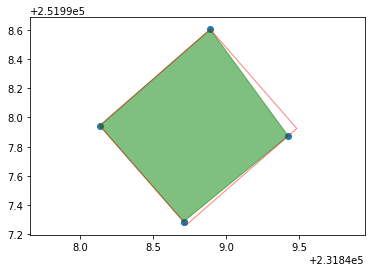

In [143]:
p = sg.Polygon(hotspots[idx])
r = p.minimum_rotated_rectangle
ax = gca()
ax.add_patch(descartes.PolygonPatch(p, alpha=0.5, color='g'))
ax.add_patch(descartes.PolygonPatch(r, alpha=0.5, fill=False,  color='r'))
ax.scatter(*p.exterior.coords.xy)
axis('equal')

In [174]:
p = sg.Polygon(hotspots[idx])
r = p.minimum_rotated_rectangle

In [175]:
np.array(r.exterior)[:-1]

array([[ 232069.90846498,  251016.12268591],
       [ 232069.91016328,  251015.2393538 ],
       [ 232070.75460205,  251015.24097732],
       [ 232070.75290375,  251016.12430942]])

(232069.85630150064, 232070.80676553177, 251015.17992941558, 251016.1837338068)

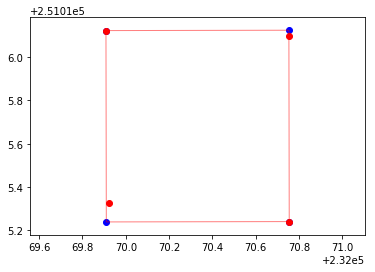

In [173]:
# suggest precomputing these results
# this tests the correctness of get_rot_length_width_from_points

idx = np.random.randint(len(hotspots))
# idx=50
p = sg.Polygon(hotspots[idx])
r = p.minimum_rotated_rectangle
ax = gca()
ax.add_patch(descartes.PolygonPatch(r, alpha=0.5, fill=False,  color='r'))
rot = OutputRepresentations.get_rot_length_width_from_points(np.array(r.exterior)[:-1])#hotspots[idx])
scatter(*OutputRepresentations.from_rot_length_width((rot[0], rot[1]), rot[2], rot[3], rot[4]).points().T, color='blue')
scatter(*hotspots[idx].T, color='r')
plt.axis('equal')

In [157]:
np.array(r.exterior)

array([[ 231997.53385374,  251736.23045216],
       [ 231998.0806148 ,  251737.06706981],
       [ 231997.30770869,  251737.57219299],
       [ 231996.76094763,  251736.73557534],
       [ 231997.53385374,  251736.23045216]])

In [54]:
from sklearn.model_selection import KFold

The "simple" thing to me is the following:
- we generate files that are all the same size (e.g. 96 by 96)       [_we can totally do this using old code_]
- we keep a record of how each file was generated from the raw input
- we keep a record that tells us what the net should predict when given that small file

In [65]:
kf = KFold(n_splits=C.FOLDS, shuffle=True, random_state=C.FOLD_RANDOM_SEED)

In [66]:
for train_index, test_index in kf.split(hotspots):
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    pos_train, pos_test = hotspots[train_index], hotspots[test_index]
    

('TRAIN:', 156, 'TEST:', 40)
('TRAIN:', 157, 'TEST:', 39)
('TRAIN:', 157, 'TEST:', 39)
('TRAIN:', 157, 'TEST:', 39)
('TRAIN:', 157, 'TEST:', 39)


In [49]:
allpos = np.zeros((len(hotspots), 8))
# ['label', 'lon', 'lat', 'box-x', 'box-y', 'box-angle', 'box-length', 'box-width']

allpos[:,0] = 1

In [67]:
pos_train

array([[[ 232355.84505441,  251185.50312952],
        [ 232356.66967967,  251185.48949935],
        [ 232356.62197408,  251184.60353833],
        [ 232355.81779408,  251184.60353833]],

       [[ 232331.96271203,  251154.7999919 ],
        [ 232332.24284489,  251154.06403731],
        [ 232331.51282476,  251153.74798054],
        [ 232331.22111616,  251154.4954134 ]],

       [[ 232280.98888696,  251333.33638543],
        [ 232281.87993987,  251333.33811805],
        [ 232281.82341957,  251332.42626475],
        [ 232280.95739772,  251332.39971508]],

       ..., 
       [[ 233210.69909224,  251975.44281022],
        [ 233210.02366842,  251975.95532615],
        [ 233210.5040616 ,  251976.77156633],
        [ 233211.2598203 ,  251976.28861581]],

       [[ 233116.20096199,  252214.71833293],
        [ 233115.43780976,  252214.32585853],
        [ 233115.00901485,  252215.24849613],
        [ 233115.78477553,  252215.64457366]],

       [[ 232756.07900896,  251396.05840087],
        [ 2